In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings

## Load dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

In [2]:
# data = pd.read_csv('/content/drive/MyDrive/IndoNutrition/nutrition.csv')
data = pd.read_csv('nutrition.csv')

In [3]:
data.head()

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...


### Hapus kolom id dan image
dalam menemukan insight yang sesuai kolom id dan image tidak diperlukan dalam kebutuhan analisis ini

In [4]:
data = data.drop(['id','image'], axis=1)

### Descriptive Statistics

In [7]:
data.describe()


,calories,proteins,fat,carbohydrate
count,1346.000000,1346.000000,1346.000000,1346.000000
mean,203.217385,10.001189,7.584027,25.390193
std,163.075430,11.847980,13.733063,32.193054
min,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1.800000,0.500000,4.525000
50%,146.000000,5.000000,2.000000,13.300000
75%,333.750000,15.000000,8.275000,37.575000
max,940.000000,83.000000,100.000000,647.000000


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      1346 non-null   float64
 1   proteins      1346 non-null   float64
 2   fat           1346 non-null   float64
 3   carbohydrate  1346 non-null   float64
 4   name          1346 non-null   object 
dtypes: float64(4), object(1)
memory usage: 52.7+ KB


### cek tidak ada kolom kosong?

In [9]:
data.isna().sum()

calories        0
proteins        0
fat             0
carbohydrate    0
name            0
dtype: int64

### cek ada baris yg duplikat?

In [10]:
data.duplicated().sum()

0

### backup data

In [11]:
df = data.copy()

# Exploratory Data Analysis
## Univariate Analysis


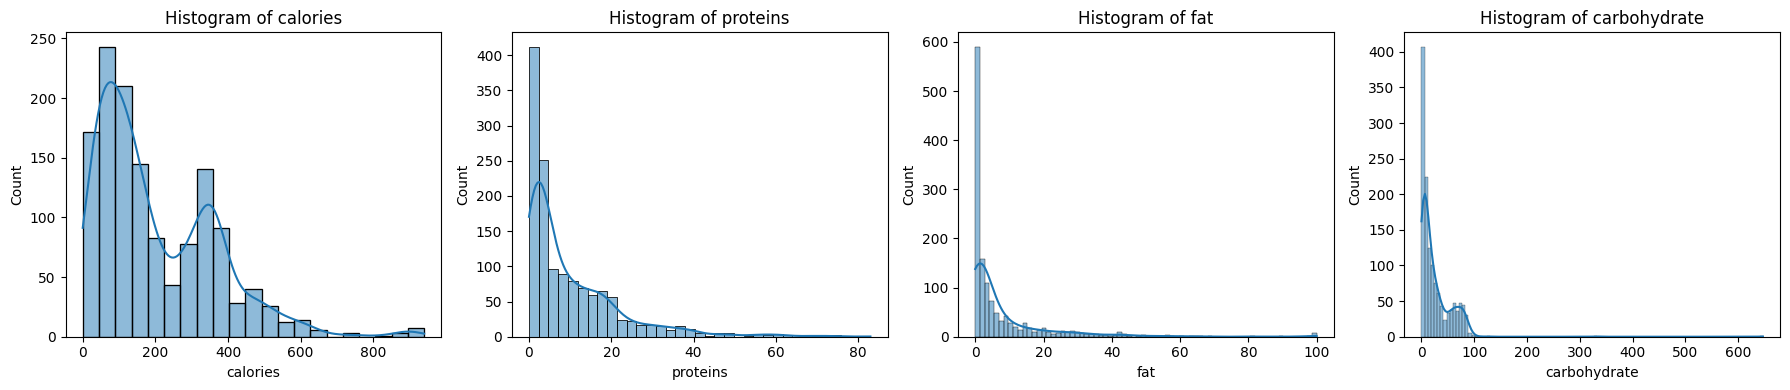

In [12]:
numerical_features = ['calories', 'proteins', 'fat', 'carbohydrate']


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 4, i+1)


    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')


    warnings.filterwarnings("ignore", category=FutureWarning)


# plt.show()
plt.tight_layout()

#### opsional
menemukan keyword 

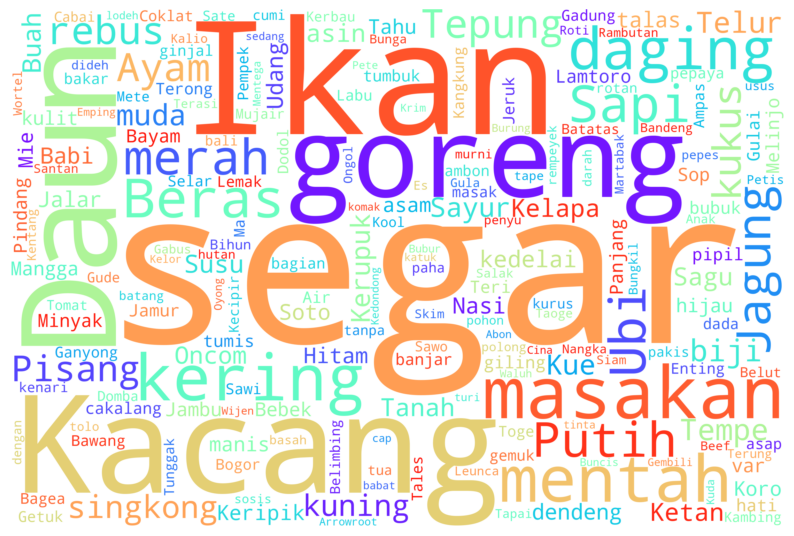

In [13]:
text = " ".join(df['name'].astype(str))


wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bivariate Analysis

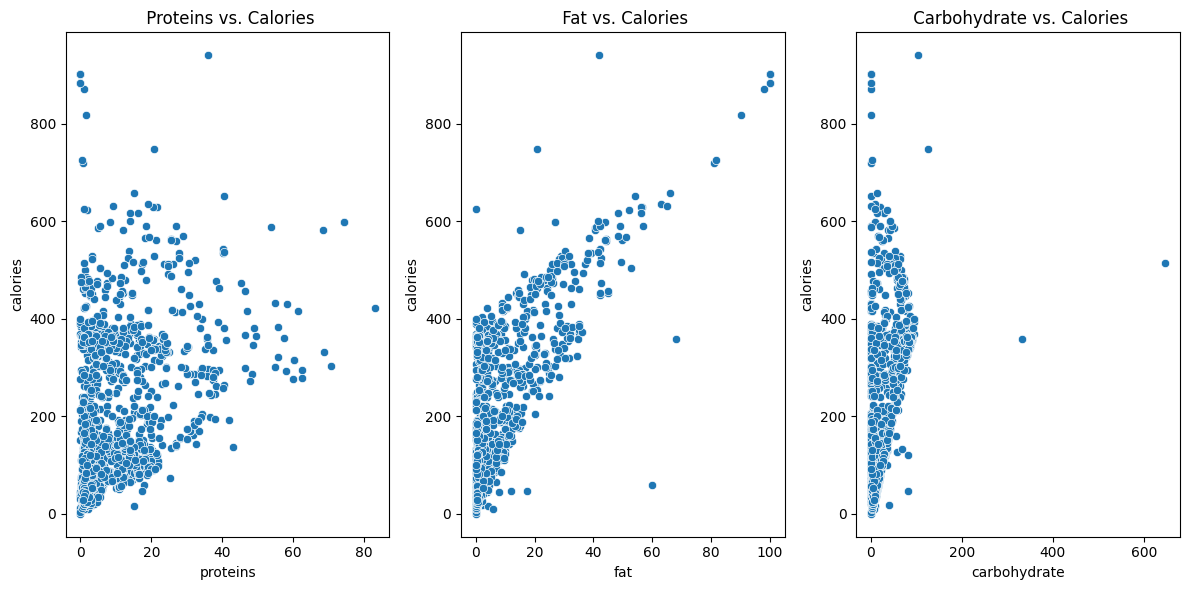

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

for i, feat in enumerate(numerical_features[1:]):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=feat, y='calories', data=df)
    plt.title(f' {feat.capitalize()} vs. Calories')


plt.tight_layout()
plt.show()

## Multivariate Analysis

Text(0.5, 1.02, 'Nutritional Content')

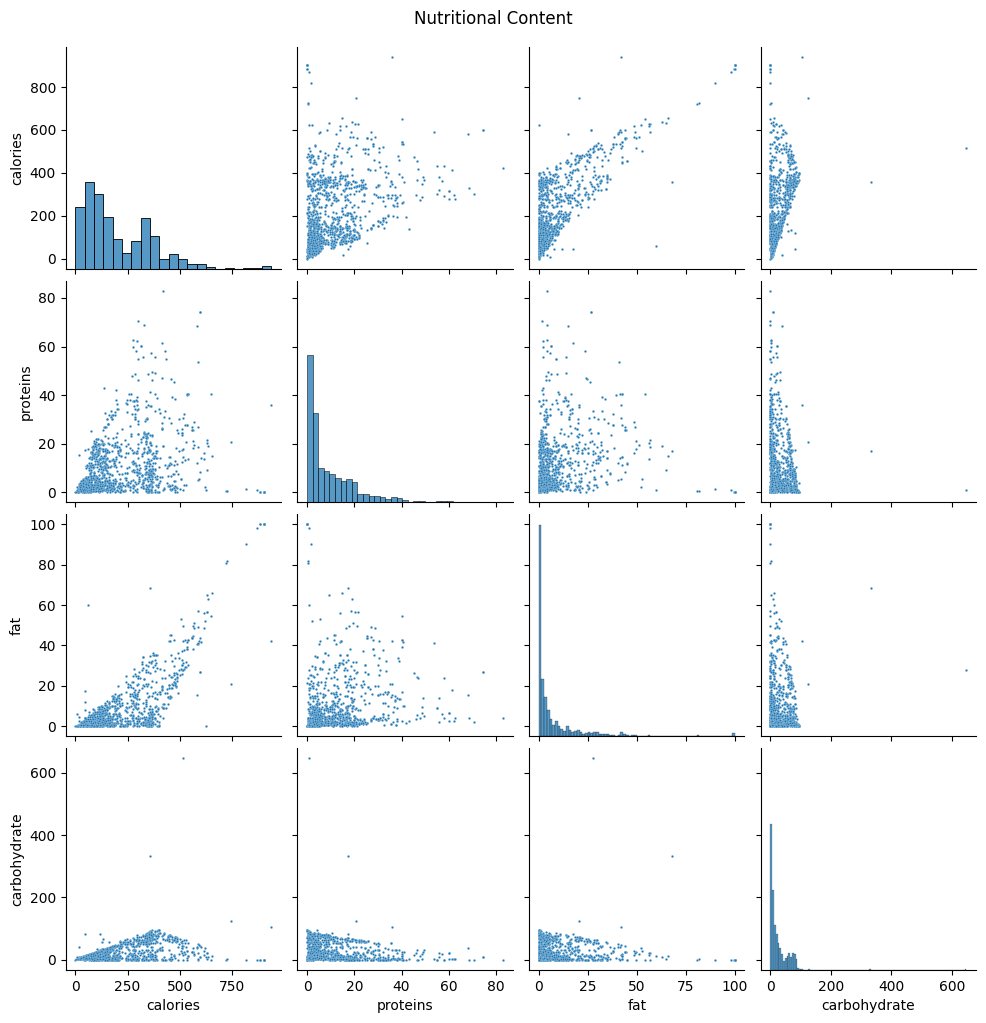

In [15]:

sns.pairplot(df[['calories', 'proteins', 'fat', 'carbohydrate']],plot_kws={"s": 3})
plt.suptitle('Nutritional Content', y=1.02)
# plt.show()

#### numerical outliers boxplot

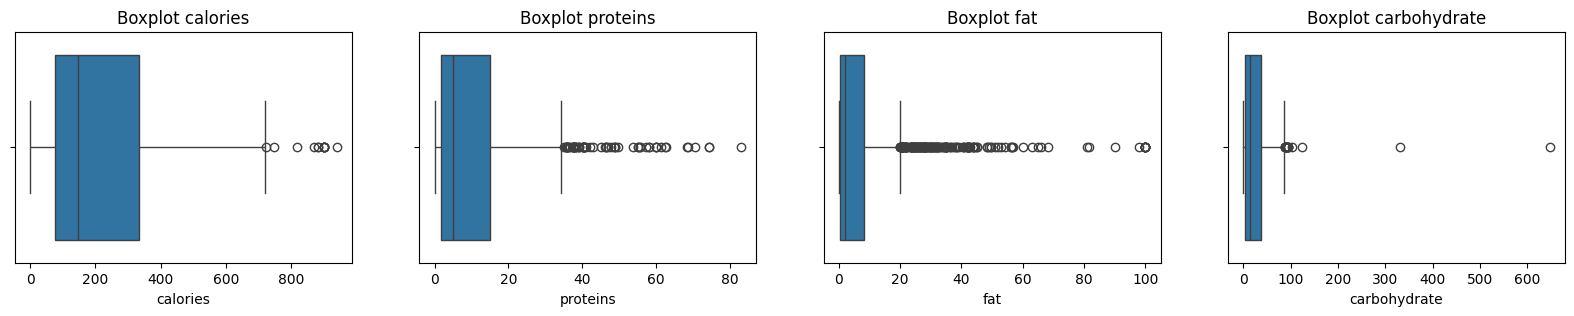

In [16]:

# import seaborn as sns


plt.figure(figsize=(20, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i+1)

    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot {feature}')


    warnings.filterwarnings("ignore", category=FutureWarning)

plt.show()


In [17]:
# # df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR=Q3-Q1
df=df[~((df[numerical_features]<(Q1-1.5*IQR))|(df[numerical_features] >(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df.shape

(1124, 5)

#### After Removing the outliers

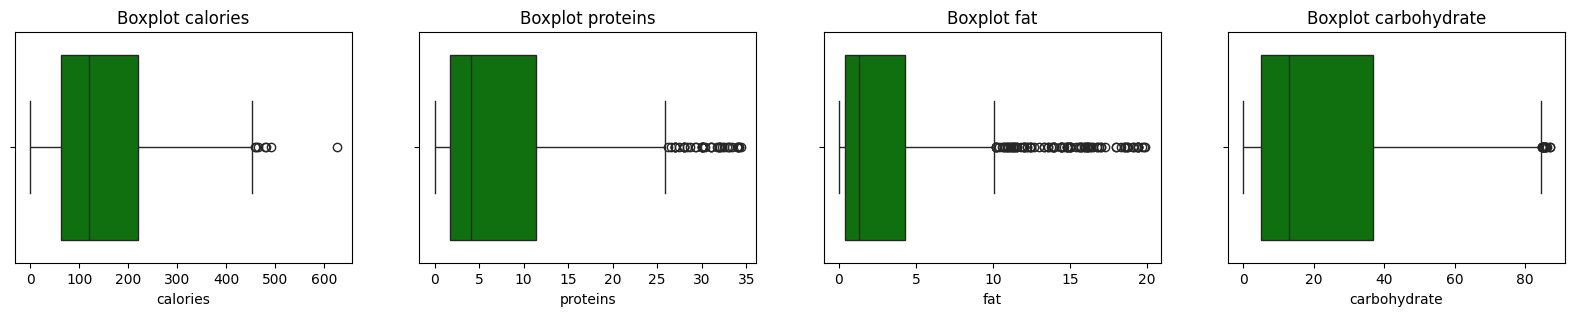

In [18]:
plt.figure(figsize=(20, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i+1)

    sns.boxplot(x=df[feature],color='green')
    plt.title(f'Boxplot {feature}')


    warnings.filterwarnings("ignore", category=FutureWarning)

plt.show()

# Data Preparation
 Label Encoding berujuan untuk kolom tipe kategorikal dan menskalakan nilai kolom numerik agar dapat mendapati insight fitur korelasi antar variable

In [19]:
catcol = []
numcol = []

for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)

print("Categorical Columns:",catcol)
print("Numerical Columns:", numcol)

encoder = LabelEncoder()

for col in catcol:  # Corrected here
    df[col] = encoder.fit_transform(df[col])

scale = MinMaxScaler()

for col in numcol:
    df[[col]] = scale.fit_transform(df[[col]])

df.head()


Categorical Columns: ['name']
Numerical Columns: ['calories', 'proteins', 'fat', 'carbohydrate']


,calories,proteins,fat,carbohydrate,name
2,0.0000,0.000000,0.010050,0.000000,0
3,0.0720,0.031977,0.020101,0.124281,1
4,0.0592,0.127907,0.025126,0.043728,2
5,0.1360,0.026163,0.326633,0.088608,3
6,0.1536,0.107558,0.030151,0.219793,5


### Korelasi antara fitur tiap variable

tujuannya mengetahui keterhubungan kuat antar variaable, pada hasil ini ternyata kalori mempunyi keterikatan kuat dengan variable variable lainnya, sehingga memutuskan bahwa variable calories cocok untuk menjadi target prediksi untuk mewakili keseluruhan nutrisi yang terkandung dari suatu makanan

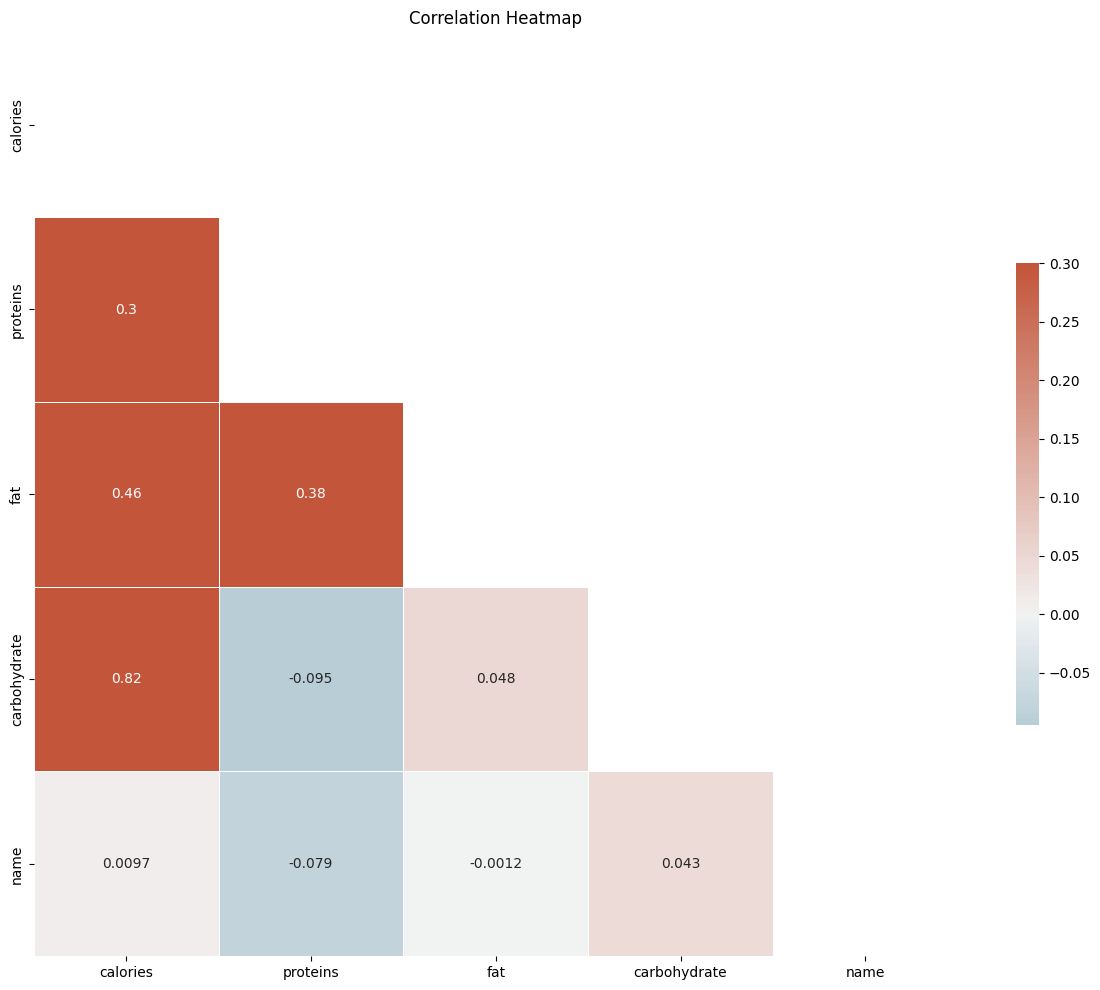

In [20]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

## train-test splitting dan Scalling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import scR
# from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
data_ml = df.copy()

In [23]:
data_ml = data_ml.drop(['name'], axis=1)

Split data 0.2 untuk tes, 0.8 untuk training dan melakukan transformasi scalling

In [24]:
X = data_ml.drop('calories', axis=1)
y = data_ml['calories']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeling

modelling yang akan di lakukan menggunakan 4 buah tipe :

LinearRegression()

RandomForestRegression(max_depth=16, n_estimators=30, n_jobs=-1, random_state=4)

AdaBoostRegression(learning_rate=0.05, random_state=42)

KNeigborsRegression(n_neighbors=10)

In [26]:
LR = LinearRegression()
RFR = RandomForestRegressor(n_estimators=30, max_depth=16, random_state=42, n_jobs=-1) #parameter
ABR = AdaBoostRegressor(learning_rate=0.05, random_state=42)
KNR = KNeighborsRegressor(n_neighbors=10)


LR.fit(X_train_scaled, y_train)


LinearRegression()

In [27]:

RFR.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=16, n_estimators=30, n_jobs=-1, random_state=42)

In [28]:

ABR.fit(X_train_scaled, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=42)

In [29]:
KNR.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

# Evaluation

fungi ini untuk mengevaluasi tiap tipe model dengan data yang sudah di split dalam 0.8 train 0.2 test dan pula menghitung R square sebagai kecocokan kalori prediksi dengan kalorri sebenarnya pada data set train dan tes

In [30]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions on the training set
    y_train_pred = model.predict(X_train)
    # Predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate MSE for train and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Calculate R2 for train and test sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Plot actual vs predicted values for test set
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('Actual Calories')
    plt.ylabel('Predicted Calories')
    plt.title(f'Actual vs Predicted Calories - {type(model).__name__}')
    plt.show()

    return mse_train, mse_test, r2_train, r2_test

benchmark model berdasarkan MSE terurut dari performa train dan tes yang terbaik sampai performa nya terjelek, semakin rata rata error menunjukkan angka yang kecil maka error semakin minimal dan pula sebaliknya
dan tampak terlihat MSE train dan tes model yang terminimum yaitu  linear regression

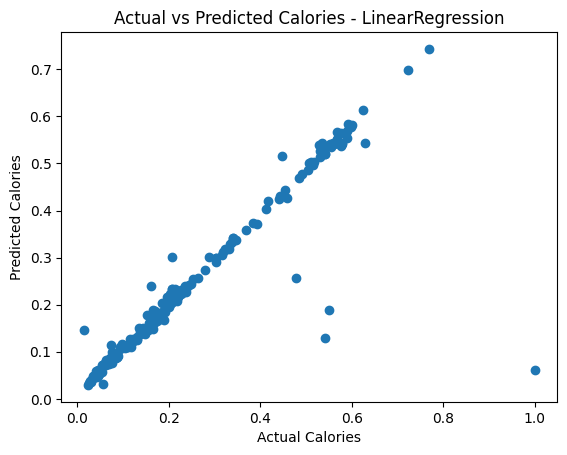

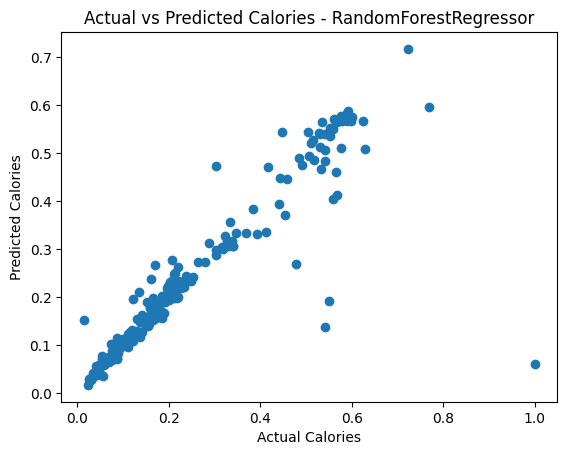

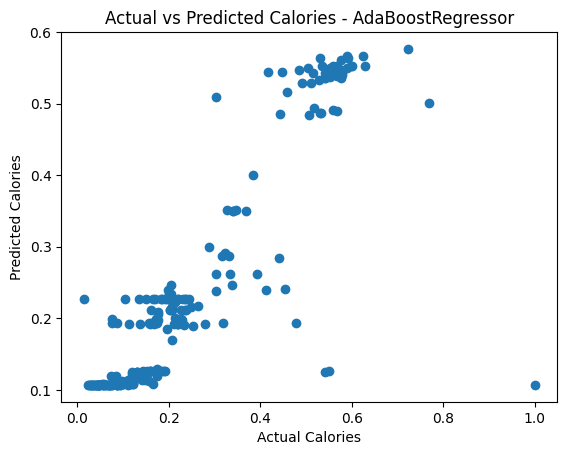

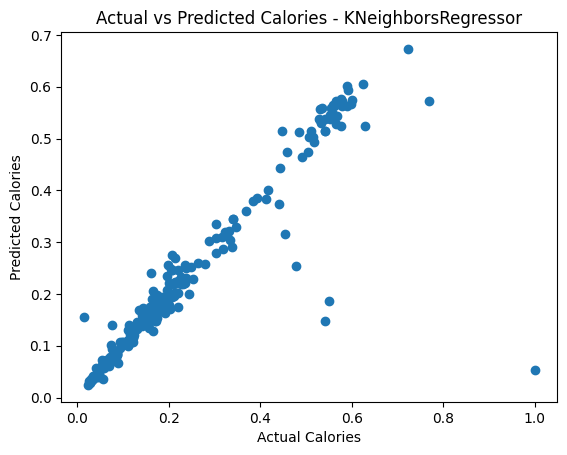

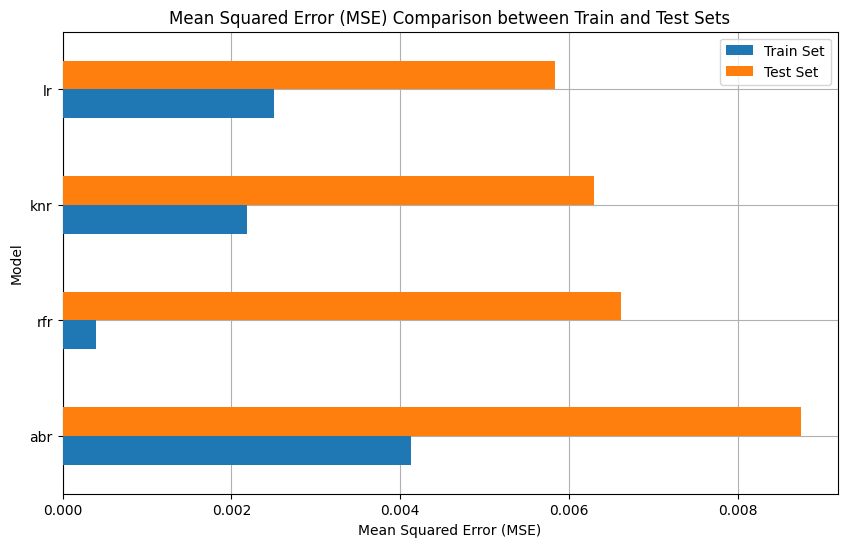

In [40]:
# Evaluate model
results = {}
models = {'lr':LR,'rfr':RFR,'abr':ABR,'knr':KNR}

for model_name, model in models.items():
    mse_train, mse_test, r2_train, r2_test = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test) # yang sudah di skalakan
    results[model_name] = {'MSE_train': mse_train, 'MSE_test': mse_test, 'R2_train': r2_train, 'R2_test': r2_test}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Sort DataFrame by test set MSE
mse_sorted = results_df.sort_values(by='MSE_test', ascending=False)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed
mse_sorted.plot(kind='barh', x='Model', y=['MSE_train', 'MSE_test'], ax=ax, zorder=3)

# Add grid lines
ax.grid(zorder=0)

# Set labels and title
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Model')
plt.title('Mean Squared Error (MSE) Comparison between Train and Test Sets')

# Add legend
plt.legend(['Train Set', 'Test Set'])

# Show the plot
plt.show()


## summary model

linear regression dengan parameter kosong sebagai best model

In [43]:
# Find the best model based on the minimum test MSE
best_model = min(results, key=lambda x: results[x]['MSE_test'])

# Extract MSE and R-squared values for the best model
best_metrics = results[best_model]

for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f'Mean Squared Error (Train): {metrics["MSE_train"]}')
    print(f'Mean Squared Error (Test): {metrics["MSE_test"]}')
    print(f'R-squared (Train): {metrics["R2_train"]}')
    print(f'R-squared (Test): {metrics["R2_test"]}')
    print()


print('=============================================')

# Print the best model and its evaluation metrics
print(f'Best Model: {best_model}')
print(f'Mean Squared Error (Train): {best_metrics["MSE_train"]}')
print(f'Mean Squared Error (Test): {best_metrics["MSE_test"]}')
print(f'R-squared (Train): {best_metrics["R2_train"]}')
print(f'R-squared (Test): {best_metrics["R2_test"]}')



Model: lr
Mean Squared Error (Train): 0.00250096263850438
Mean Squared Error (Test): 0.0058361287734854305
R-squared (Train): 0.929461603244967
R-squared (Test): 0.8371261637800137

Model: rfr
Mean Squared Error (Train): 0.0003918847626762101
Mean Squared Error (Test): 0.0066212268782007335
R-squared (Train): 0.9889470868351566
R-squared (Test): 0.8152157596256422

Model: abr
Mean Squared Error (Train): 0.00412951658269911
Mean Squared Error (Test): 0.008744347598192917
R-squared (Train): 0.8835290561193212
R-squared (Test): 0.7559640141887868

Model: knr
Mean Squared Error (Train): 0.002184837819942158
Mean Squared Error (Test): 0.006294557284124444
R-squared (Train): 0.9383777451866915
R-squared (Test): 0.8243324073263159

Best Model: lr
Mean Squared Error (Train): 0.00250096263850438
Mean Squared Error (Test): 0.0058361287734854305
R-squared (Train): 0.929461603244967
R-squared (Test): 0.8371261637800137
